In [1]:
## 📦 Step 1: Import Libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv("barista_coffee_sales_data.csv")
df.head()

,order_date,order_time,product_category,qty,unit_price,store_id,store_location,customer_id,customer_age,customer_gender,loyalty_member,is_repeat_customer,customer_discovery_source,payment_method,discount_applied,total_amount,promo_applied,promo_type
0,29/04/2023,22:47:20,Pizza,3,7.08,STORE_7,Airport,CUST_1,36,Female,False,False,Walk-in,Cash,0.23,29.27,False,NaN
1,26/02/2023,09:44:20,Coffee,4,4.97,STORE_10,Suburbs,CUST_2,39,Male,True,True,Walk-in,Wallet,0.46,36.52,True,NaN
2,08/08/2021,20:50:40,Coffee,1,3.17,STORE_4,Airport,CUST_3,19,Female,True,False,Social Media,Card,0.24,13.17,False,Flat discount
3,29/01/2022,16:31:01,Pizza,3,6.42,STORE_4,Suburbs,CUST_4,25,Female,True,False,Walk-in,UPI,0.35,17.88,False,Flat discount
4,12/04/2022,07:18:01,Snacks,3,4.51,STORE_8,Uptown,CUST_5,53,Male,False,True,Friend,Cash,0.32,45.61,True,Flat discount


In [3]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   order_date                 100000 non-null  object 
 1   order_time                 100000 non-null  object 
 2   product_category           100000 non-null  object 
 3   qty                        100000 non-null  int64  
 4   unit_price                 100000 non-null  float64
 5   store_id                   100000 non-null  object 
 6   store_location             100000 non-null  object 
 7   customer_id                100000 non-null  object 
 8   customer_age               100000 non-null  int64  
 9   customer_gender            100000 non-null  object 
 10  loyalty_member             100000 non-null  bool   
 11  is_repeat_customer         100000 non-null  bool   
 12  customer_discovery_source  100000 non-null  object 
 13  payment_method             100

,qty,unit_price,customer_age,discount_applied,total_amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.497830,5.005728,41.058940,0.250107,27.462681
std,1.118225,1.731676,13.591079,0.144565,12.994753
min,1.000000,2.000000,18.000000,0.000000,5.000000
25%,1.000000,3.500000,29.000000,0.120000,16.180000
50%,2.000000,5.020000,41.000000,0.250000,27.490000
75%,3.000000,6.510000,53.000000,0.380000,38.750000
max,4.000000,8.000000,64.000000,0.500000,50.000000


In [4]:
# Check for missing values
df.isnull().sum()
df[df['promo_type'].isnull()]['promo_applied'].value_counts()
df['promo_type'] = df['promo_type'].fillna('No Promo')
# check for duplicate 
df.duplicated().sum()

0

In [5]:
#Data Types and Coloumn
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()

numeric_cols, categorical_cols, boolean_cols

(['qty', 'unit_price', 'customer_age', 'discount_applied', 'total_amount'],
 ['order_date',
  'order_time',
  'product_category',
  'store_id',
  'store_location',
  'customer_id',
  'customer_gender',
  'customer_discovery_source',
  'payment_method',
  'promo_type'],
 ['loyalty_member', 'is_repeat_customer', 'promo_applied'])

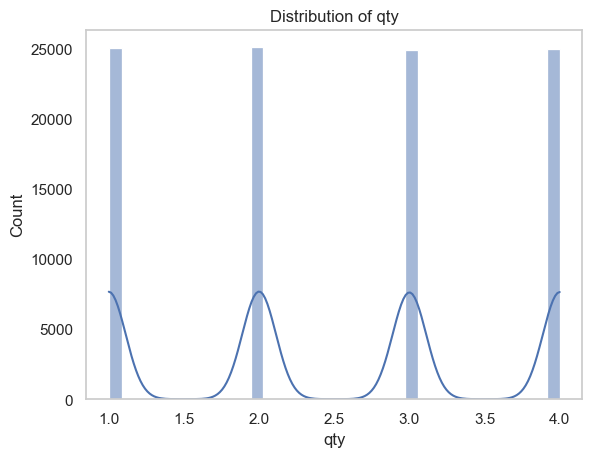

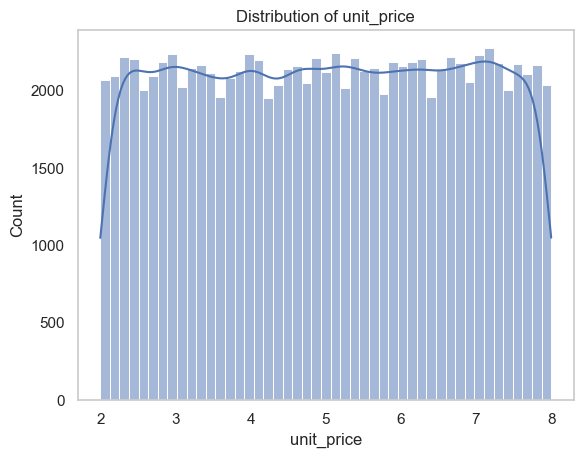

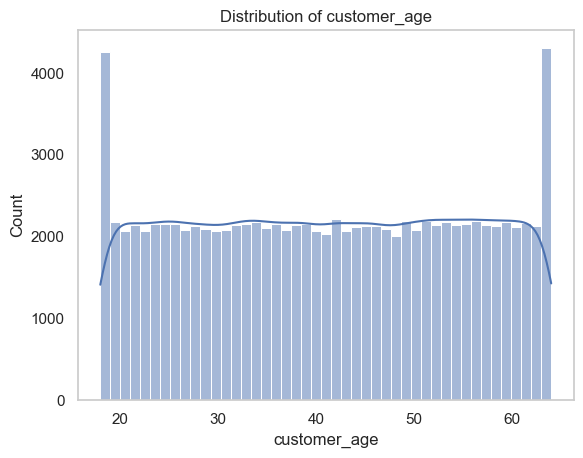

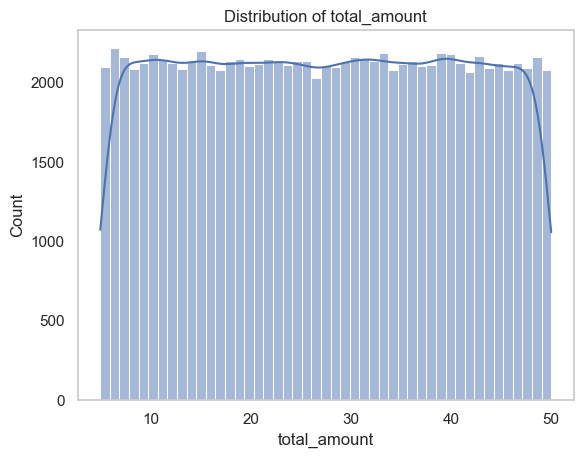

In [19]:
#Numeric Distribution
for col in ['qty', 'unit_price', 'customer_age', 'total_amount']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    plt.show()

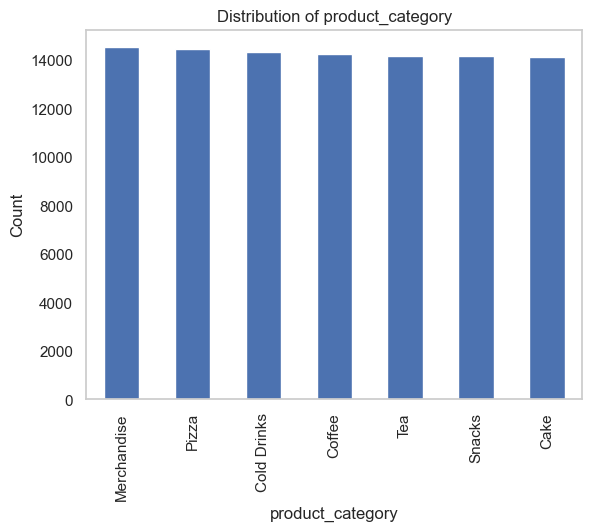

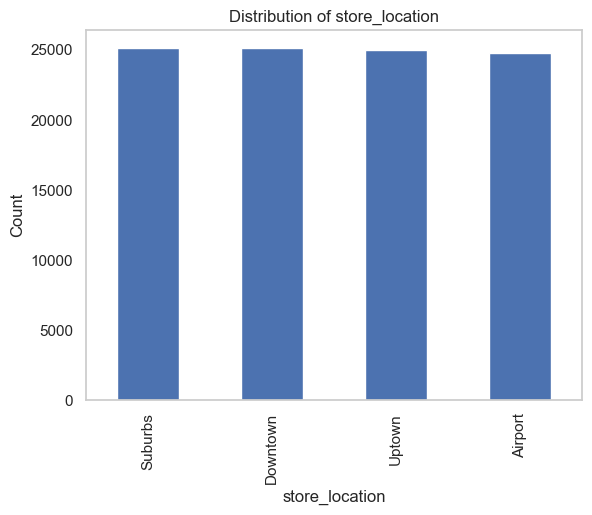

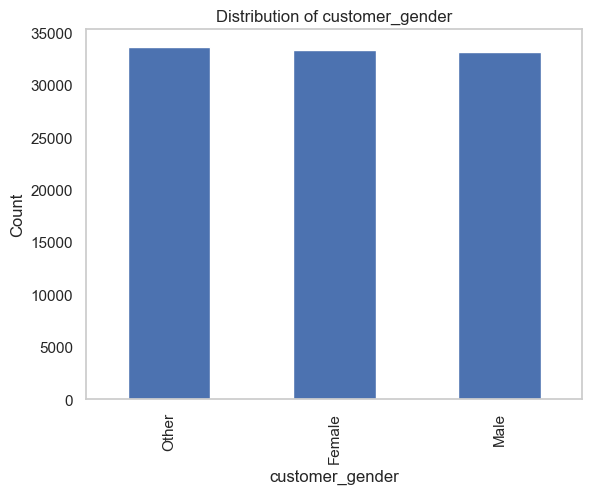

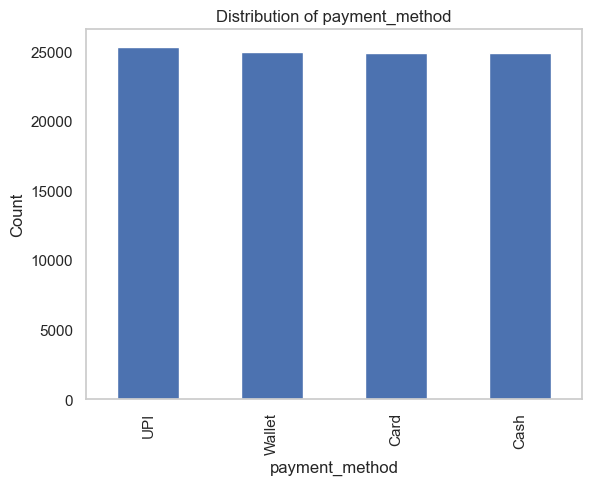

In [26]:
#category Counts
for col in ['product_category', 'store_location', 'customer_gender', 'payment_method']:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel("Count")
    plt.grid(False)
    plt.show()

In [11]:
#Time Feature

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df['day_of_week'] = df['order_date'].dt.day_name()

C:\Users\asus\AppData\Local\Temp\ipykernel_14676\1883542803.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('order_date')['total_amount'].resample('M').sum().plot()


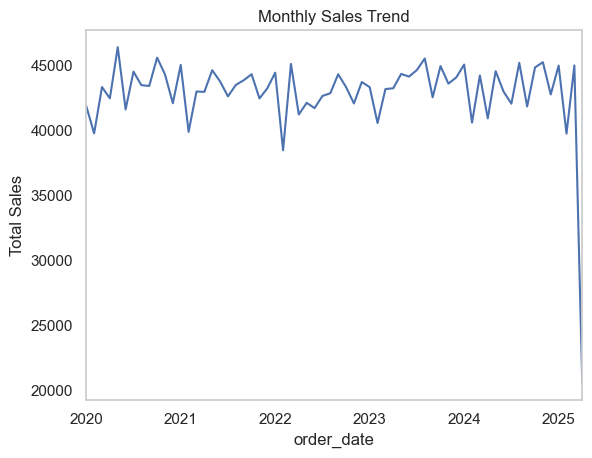

In [21]:
#Monthly sales Trend
df.set_index('order_date')['total_amount'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()

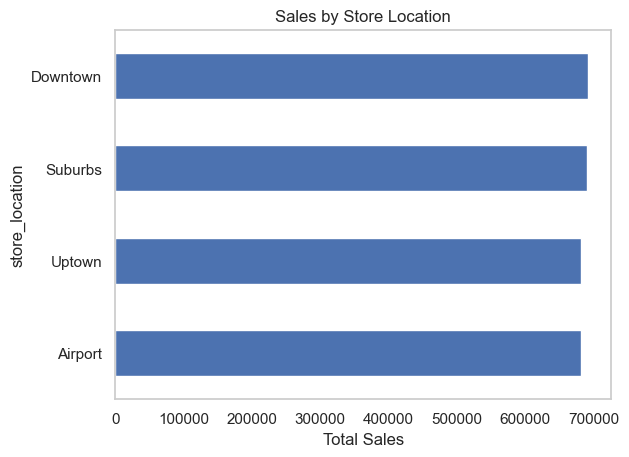

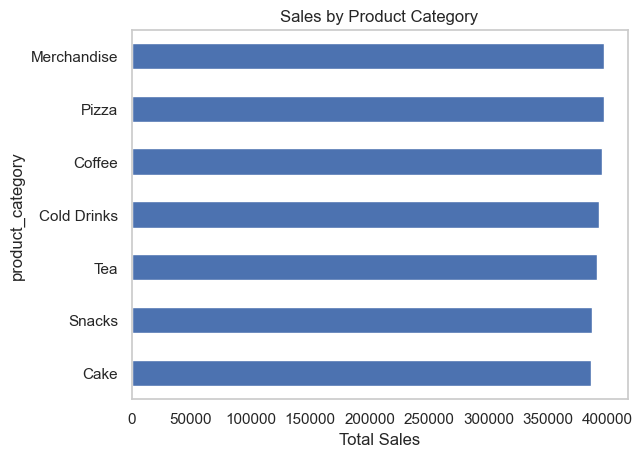

In [22]:
#sales by store and Product
df.groupby('store_location')['total_amount'].sum().sort_values().plot(kind='barh')
plt.title('Sales by Store Location')
plt.xlabel('Total Sales')
plt.grid(False)
plt.show()

df.groupby('product_category')['total_amount'].sum().sort_values().plot(kind='barh')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales')
plt.grid(False)
plt.show()

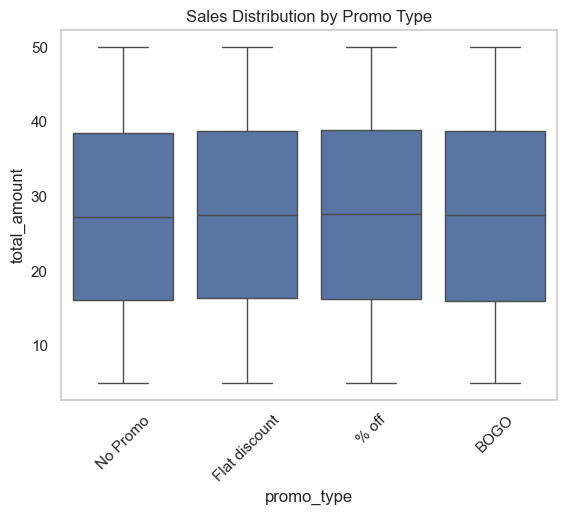

In [23]:
#Promotion and Discount
sns.boxplot(x='promo_type', y='total_amount', data=df)
plt.title('Sales Distribution by Promo Type')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

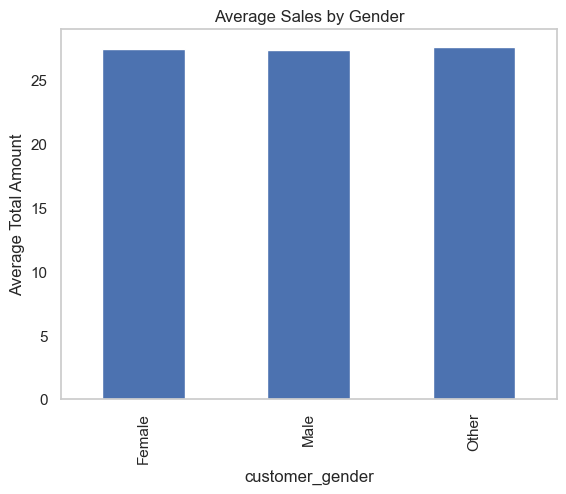

In [24]:
#Customer Analysis
df.groupby('customer_gender')['total_amount'].mean().plot(kind='bar')
plt.title('Average Sales by Gender')
plt.ylabel('Average Total Amount')
plt.grid(False)
plt.show()

In [15]:
df_cleaned = df.drop_duplicates()

In [16]:
df_cleaned.reset_index(drop=True, inplace=True)

In [18]:
df_cleaned.to_csv('clean_barista_data.csv', index=False, sep=',')